# Exercises

file name: time_series_anomaly_detection.py or time_series_anomaly_detection.ipynb

The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is curriculum_logs.

Go through the lesson commenting code, adding docstrings, and adding markdown to support what is happening.

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import env

# Acquire and Prepare

In [2]:
# url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'

# query = '''
# SELECT logs.date,  logs.time,
#       logs.path as endpoint,
#       logs.user_id,
#       logs.cohort_id,
#       logs.ip as source_ip,
#       cohorts.name as cohort_name,
#       cohorts.start_date as cohort_start,
#       cohorts.end_date as cohort_end,
#       cohorts.program_id as program_id
# FROM logs
# JOIN cohorts ON logs.cohort_id= cohorts.id;
# '''
# df = pd.read_sql(query, url)
# df.head()

In [3]:
df = pd.read_csv('curriculum_exercise.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,date,time,endpoint,user_id,cohort_id,source_ip,cohort_name,cohort_start,cohort_end,program_id
0,0,0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
1,1,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
2,2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
3,3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1
4,4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2


In [4]:
# Concatenate date and time to new column so data can be explored more clearly
df['date_time']=df.date+' '+df.time

In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
df.head()

,Unnamed: 0,Unnamed: 0.1,date,time,endpoint,user_id,cohort_id,source_ip,cohort_name,cohort_start,cohort_end,program_id,date_time
0,0,0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:55:03
1,1,1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:02
2,2,2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:05
3,3,3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:06
4,4,4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2,2018-01-26 09:56:24


In [7]:
# Convert cohort start and end dates to datetime
df.cohort_start = pd.to_datetime(df.cohort_start)
df.cohort_end = pd.to_datetime(df.cohort_end)

In [8]:
# Converting date_time to pandas datetime format and indexing it
df.date_time = pd.to_datetime(df.date_time)
df = df.set_index(df.date_time)

In [9]:
# Dropping unnecessary columns
df = df.drop(columns = ['Unnamed: 0', 'Unnamed: 0.1'])

In [10]:
df.head(3)

,date,time,endpoint,user_id,cohort_id,source_ip,cohort_name,cohort_start,cohort_end,program_id,date_time
date_time,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:55:03
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:02
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:05


In [11]:
# Ensuring the code is working for datetime format and indexing date_time
df.dtypes

date            datetime64[ns]
time                    object
endpoint                object
user_id                  int64
cohort_id              float64
source_ip               object
cohort_name             object
cohort_start    datetime64[ns]
cohort_end      datetime64[ns]
program_id               int64
date_time       datetime64[ns]
dtype: object

# Exploring data and look for anomalies

In [12]:
# defining counts of pages accessed per day
pages = df['endpoint'].resample('d').count()
pages.head()

date_time
2018-01-26    533
2018-01-27    230
2018-01-28    168
2018-01-29    783
2018-01-30    614
Freq: D, Name: endpoint, dtype: int64

<AxesSubplot:>

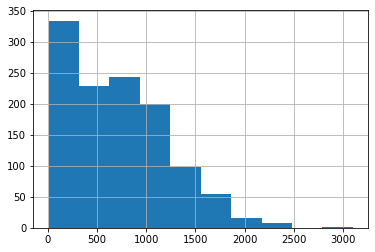

In [13]:
pages.hist()

<AxesSubplot:xlabel='date_time'>

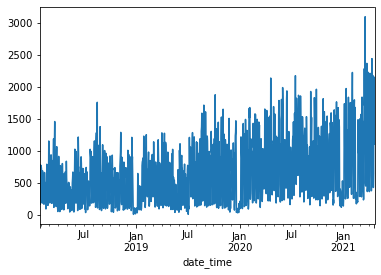

In [14]:
pages.plot()

In [15]:
# Calculating exponential moving averages over different time periods
# 7 day EMA
ema_7d = pages.ewm(span=7).mean()
ema_7d.head()


date_time
2018-01-26    533.000000
2018-01-27    359.857143
2018-01-28    276.891892
2018-01-29    461.982857
2018-01-30    511.811780
Freq: D, Name: endpoint, dtype: float64

In [16]:
# 14 days EMA
ema_14d = pages.ewm(span=14).mean()
ema_14d.head()


date_time
2018-01-26    533.000000
2018-01-27    370.678571
2018-01-28    293.254669
2018-01-29    443.081581
2018-01-30    487.673935
Freq: D, Name: endpoint, dtype: float64

In [17]:
# 30 days EMA
ema_30d = pages.ewm(span=30).mean()
ema_30d.head()


date_time
2018-01-26    533.000000
2018-01-27    376.450000
2018-01-28    302.284709
2018-01-29    434.739290
2018-01-30    475.525441
Freq: D, Name: endpoint, dtype: float64

In [18]:
# 90 days EMA
ema_90d = pages.ewm(span=90).mean()
ema_90d.head()


date_time
2018-01-26    533.000000
2018-01-27    379.816667
2018-01-28    307.636352
2018-01-29    430.467642
2018-01-30    468.823433
Freq: D, Name: endpoint, dtype: float64

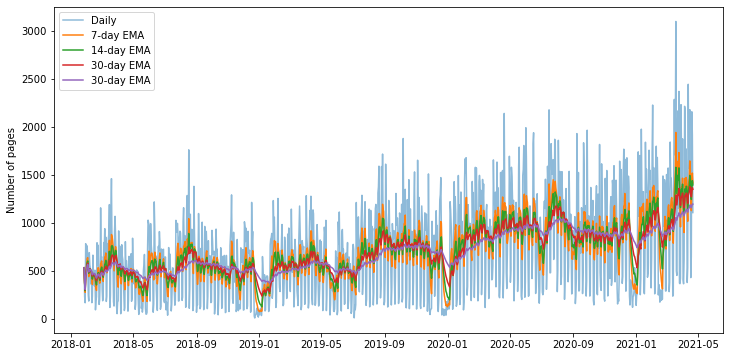

In [19]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(pages.index, pages, label='Daily', alpha=.5)

ax.plot(pages.index, ema_7d, label = '7-day EMA')
ax.plot(pages.index, ema_14d, label = '14-day EMA')
ax.plot(pages.index, ema_30d, label = '30-day EMA')
ax.plot(pages.index, ema_90d, label = '30-day EMA')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()


# Compute Bollinger bands and %b

In [20]:
# set the window span
span = 30

# compute midband
midband = pages.ewm(span=span).mean()

midband.head()


date_time
2018-01-26    533.000000
2018-01-27    376.450000
2018-01-28    302.284709
2018-01-29    434.739290
2018-01-30    475.525441
Freq: D, Name: endpoint, dtype: float64

In [21]:
# compute exponential stdev
stdev = pages.ewm(span=span).std()

stdev.head()


date_time
2018-01-26           NaN
2018-01-27    214.253355
2018-01-28    192.738756
2018-01-29    292.489456
2018-01-30    262.780177
Freq: D, Name: endpoint, dtype: float64

In [22]:
# compute upper and lower bands
ub = midband + stdev*3
lb = midband - stdev*3
ub


date_time
2018-01-26            NaN
2018-01-27    1019.210064
2018-01-28     880.500977
2018-01-29    1312.207658
2018-01-30    1263.865971
                 ...     
2021-04-17    3539.572262
2021-04-18    3480.391221
2021-04-19    3565.644683
2021-04-20    3575.685641
2021-04-21    3495.320435
Freq: D, Name: endpoint, Length: 1182, dtype: float64

In [23]:
lb


date_time
2018-01-26           NaN
2018-01-27   -266.310064
2018-01-28   -275.931559
2018-01-29   -442.729079
2018-01-30   -312.815089
                 ...    
2021-04-17   -912.134710
2021-04-18   -938.465770
2021-04-19   -909.520874
2021-04-20   -843.053691
2021-04-21   -796.148610
Freq: D, Name: endpoint, Length: 1182, dtype: float64

In [24]:
type(lb)

pandas.core.series.Series

In [25]:
# make all negative values in lower bound 0
# lb[lb<0] = 0

In [26]:
# lb.sort_values()

In [27]:
# concatenate ub and lb together into one df, bb
bb = pd.concat([ub, lb], axis=1)

bb.columns = ['ub', 'lb']
bb.head()


,ub,lb
date_time,,
2018-01-26,NaN,NaN
2018-01-27,1019.210064,-266.310064
2018-01-28,880.500977,-275.931559
2018-01-29,1312.207658,-442.729079
2018-01-30,1263.865971,-312.815089


In [28]:
# concating pages, midband, ub, lb
my_df = pd.concat([pages, midband, bb], axis=1)
my_df.columns = ['pages', 'midband', 'ub', 'lb']
my_df.head()


,pages,midband,ub,lb
date_time,,,,
2018-01-26,533,533.000000,NaN,NaN
2018-01-27,230,376.450000,1019.210064,-266.310064
2018-01-28,168,302.284709,880.500977,-275.931559
2018-01-29,783,434.739290,1312.207658,-442.729079
2018-01-30,614,475.525441,1263.865971,-312.815089


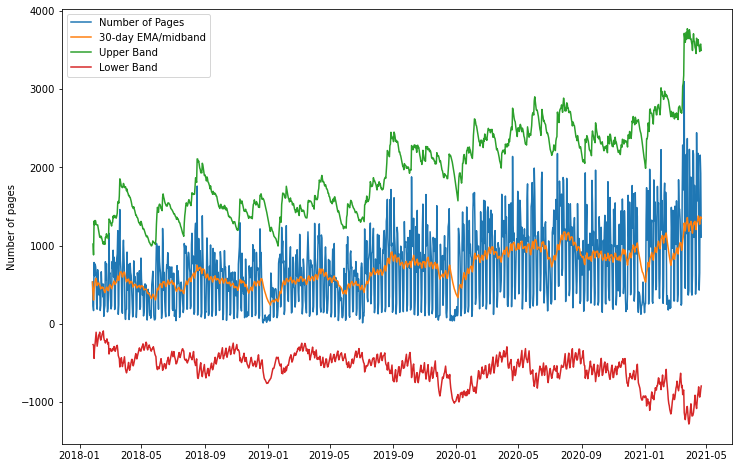

In [29]:
# Plots the bands
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(my_df.index, my_df.pages, label='Number of Pages')

ax.plot(my_df.index, my_df.midband, label = '30-day EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()


# Compute %b

In [30]:
# get the last measure of gb
last_measure = my_df.iloc[-1].pages
last_measure


1107.0

In [31]:
# get the lower band value on the last date
last_lb = my_df.iloc[-1].lb
last_lb


-796.1486103269135

In [32]:
# get the upper band value on the last date
last_ub = my_df.iloc[-1].ub
last_ub


3495.320435064684

In [33]:
# compute %b
last_pct_b = (last_measure - last_lb)/(last_ub - last_lb)

print('%b for last datapoint: ', round(last_pct_b, 2))


%b for last datapoint:  0.44


In [34]:
my_df.tail(3)


,pages,midband,ub,lb
date_time,,,,
2021-04-19,2156,1328.061905,3565.644683,-909.520874
2021-04-20,1921,1366.315975,3575.685641,-843.053691
2021-04-21,1107,1349.585912,3495.320435,-796.148610


In [35]:
# to compute each point in the time 
my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])

my_df.head()


,pages,midband,ub,lb,pct_b
date_time,,,,,
2018-01-26,533,533.000000,NaN,NaN,NaN
2018-01-27,230,376.450000,1019.210064,-266.310064,0.386077
2018-01-28,168,302.284709,880.500977,-275.931559,0.383880
2018-01-29,783,434.739290,1312.207658,-442.729079,0.698446
2018-01-30,614,475.525441,1263.865971,-312.815089,0.587827


In [36]:
# looking for anomalies 
my_df[my_df['pct_b']>1]

,pages,midband,ub,lb,pct_b
date_time,,,,,


In [37]:
my_df[my_df['pct_b']>1].sort_values(by = 'pct_b', ascending = False)

,pages,midband,ub,lb,pct_b
date_time,,,,,


# Bonus:

# Discover users who are accessing our curriculum pages way beyond the end of their codeup time. What would the dataframe look like? Use time series method for detecting anomalies, like exponential moving average with %b.

# Can you label students who are viewing both the web dev and data science curriculum?

In [38]:
# Make a dataframe showing userID and number of classes

all_class = pd.DataFrame(df.groupby(by='user_id').cohort_id.nunique().sort_values(ascending=False))

In [39]:
df.groupby(by='user_id').cohort_id.nunique().sort_values(ascending=False)

user_id
64     3
88     3
1      2
148    2
312    2
      ..
377    1
378    1
379    1
380    1
981    1
Name: cohort_id, Length: 911, dtype: int64

In [40]:
df.groupby(by='user_id').cohort_id.nunique()

user_id
1      2
2      1
3      1
4      1
5      1
      ..
977    1
978    1
979    1
980    1
981    1
Name: cohort_id, Length: 911, dtype: int64

In [41]:
df.groupby(by='user_id').cohort_id.nunique().value_counts()

1    872
2     37
3      2
Name: cohort_id, dtype: int64

In [42]:
# Instead of making a separate dataframe, add this information as a column
all_class.head()

,cohort_id
user_id,
64,3
88,3
1,2
148,2
312,2


In [43]:
all_class.rename(columns={'cohort_id': 'number_of_classes'}, inplace=True)

In [44]:
student_both = all_class[all_class.number_of_classes >= 2]

In [45]:
student_both.shape

(39, 1)

# Can you label students by the program they are in

In [46]:
df.head(3)

,date,time,endpoint,user_id,cohort_id,source_ip,cohort_name,cohort_start,cohort_end,program_id,date_time
date_time,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:55:03
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:02
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2018-01-26 09:56:05


In [47]:
df['program'] = 'web_dev'

In [48]:
valmap = {2:'java_web_dev', 1:'php_web_dev', 3:'data_science', 4:'front_end_web_dev'}
df['program']=df['program_id'].map(valmap)

In [49]:
df.program_id.unique()

array([1, 2, 4, 3])

In [50]:
df.sample(30)

,date,time,endpoint,user_id,cohort_id,source_ip,cohort_name,cohort_start,cohort_end,program_id,date_time,program
date_time,,,,,,,,,,,,
2019-01-08 09:02:50,2019-01-08,09:02:50,/,294,27.0,97.105.19.58,Yosemite,2018-11-05,2019-04-03,2,2019-01-08 09:02:50,java_web_dev
2018-07-16 13:05:30,2018-07-16,13:05:30,javascript-ii/promises,186,24.0,97.105.19.58,Voyageurs,2018-05-29,2018-10-11,2,2018-07-16 13:05:30,java_web_dev
2020-03-17 10:31:16,2020-03-17,10:31:16,spring/fundamentals/repositories,517,52.0,97.105.19.58,Europa,2019-11-04,2020-04-17,2,2020-03-17 10:31:16,java_web_dev
2019-07-01 14:57:24,2019-07-01,14:57:24,javascript-i/arrays,417,32.0,97.105.19.58,Betelgeuse,2019-05-28,2019-10-08,2,2019-07-01 14:57:24,java_web_dev
2020-06-05 08:42:02,2020-06-05,08:42:02,spring/fundamentals/services,521,28.0,99.88.62.179,Staff,2014-02-04,2014-02-04,2,2020-06-05 08:42:02,java_web_dev
2019-11-01 10:33:36,2019-11-01,10:33:36,web-design/ui/typography,500,51.0,97.105.19.58,Deimos,2019-09-16,2020-02-27,2,2019-11-01 10:33:36,java_web_dev
2020-12-15 09:34:36,2020-12-15,09:34:36,html-css/css-ii/bootstrap-grid-system,807,132.0,66.69.219.165,Kalypso,2020-11-02,2021-05-04,2,2020-12-15 09:34:36,java_web_dev
2018-02-07 11:27:21,2018-02-07,11:27:21,spring,64,1.0,97.105.19.61,Arches,2014-02-04,2014-04-22,1,2018-02-07 11:27:21,php_web_dev
2020-09-03 20:28:06,2020-09-03,20:28:06,python/intro-to-matplotlib,692,59.0,96.8.130.201,Darden,2020-07-13,2021-01-12,3,2020-09-03 20:28:06,data_science


# Can you label users by student vs. staff?

In [51]:
staff = df[df.cohort_name == 'Staff']
staff

,date,time,endpoint,user_id,cohort_id,source_ip,cohort_name,cohort_start,cohort_end,program_id,date_time,program
date_time,,,,,,,,,,,,
2018-12-06 14:15:29,2018-12-06,14:15:29,appendix/further-reading/java/intellij-tomcat-...,53,28.0,97.105.19.58,Staff,2014-02-04,2014-02-04,2,2018-12-06 14:15:29,java_web_dev
2018-12-06 14:25:40,2018-12-06,14:25:40,javascript-i,314,28.0,97.105.19.58,Staff,2014-02-04,2014-02-04,2,2018-12-06 14:25:40,java_web_dev
2018-12-06 14:25:41,2018-12-06,14:25:41,javascript-i/coffee-project,314,28.0,97.105.19.58,Staff,2014-02-04,2014-02-04,2,2018-12-06 14:25:41,java_web_dev
2018-12-06 15:31:29,2018-12-06,15:31:29,spring,40,28.0,170.248.173.247,Staff,2014-02-04,2014-02-04,2,2018-12-06 15:31:29,java_web_dev
2018-12-06 15:31:33,2018-12-06,15:31:33,spring/fundamentals/security,40,28.0,170.248.173.247,Staff,2014-02-04,2014-02-04,2,2018-12-06 15:31:33,java_web_dev
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 16:41:51,2021-04-21,16:41:51,jquery/personal-site,64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,2,2021-04-21 16:41:51,java_web_dev
2021-04-21 16:42:02,2021-04-21,16:42:02,jquery/mapbox-api,64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,2,2021-04-21 16:42:02,java_web_dev
2021-04-21 16:42:09,2021-04-21,16:42:09,jquery/ajax/weather-map,64,28.0,71.150.217.33,Staff,2014-02-04,2014-02-04,2,2021-04-21 16:42:09,java_web_dev


# Adam Version of Curriculum Questions

# Exercises
- file name: `time_series_anomaly_detection.py` or `time_series_anomaly_detection.ipynb`

The dataset for these exercises lives in the Codeup Data Science MySQL Server. The database name is curriculum_logs.

**Hint**: You will need to explore the database and significantly adjust your acquisition step (yay SQL!)

1. Label students by the program they are in.
1. Is it possible to identify the user_id of a staff member?
1. Identify students who are accessing our curriculum pages beyond the end of their time at Codeup.
1. Identify students who present anomalous activity using the Bollinger Band method, but reduce K to 2. 
1. Plot the access activity of these students.

**BONUS:** Identify users who are viewing both the web dev and data science curriculum 

In [52]:
import pandas as pd
from scipy.stats import entropy
import numpy as np
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('curriculum-access.csv')
df.head()

,date,endpoint,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [54]:
# renaming columns
df = df.rename(columns = {'endpoint' : 'pages'})

In [55]:
df.head()

,date,pages,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [56]:
# converting the date to pandas datatype
df.date = pd.to_datetime(df.date)

In [57]:
# setting date as index
# df = df.set_index('date')
df

,date,pages,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61
...,...,...,...,...,...
900218,2021-04-21,jquery/personal-site,64,28.0,71.150.217.33
900219,2021-04-21,jquery/mapbox-api,64,28.0,71.150.217.33
900220,2021-04-21,jquery/ajax/weather-map,64,28.0,71.150.217.33
900221,2021-04-21,anomaly-detection/discrete-probabilistic-methods,744,28.0,24.160.137.86


In [58]:
# page visited counts per cohorts
df.cohort_id.value_counts(dropna = False)

28.0     84031
NaN      52893
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21582
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: cohort_id, dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       900223 non-null  datetime64[ns]
 1   pages      900222 non-null  object        
 2   user_id    900223 non-null  int64         
 3   cohort_id  847330 non-null  float64       
 4   source_ip  900223 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 34.3+ MB


In [60]:
df.pages.value_counts().head()

/                           50313
search/search_index.json    19519
javascript-i                18983
toc                         18297
java-iii                    13733
Name: pages, dtype: int64

In [61]:
df.head(1)

,date,pages,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61


In [62]:
# Unique numbers of user_id
user_id_size = df.user_id.nunique()
user_id_size

981

In [63]:
# Unique numbers of cohort_id
cohort_id_size = df.cohort_id.nunique()
cohort_id_size

47

In [64]:
# average cohort size 
cohort_size = user_id_size / cohort_id_size
cohort_size

20.872340425531913

In [65]:
# students counts per cohort
pd.DataFrame(df.groupby('cohort_id').user_id.nunique()).rename(columns = {'user_id' : 'student_count'})

,student_count
cohort_id,
1.0,18
2.0,3
4.0,1
5.0,1
6.0,2
7.0,6
8.0,5
9.0,1
11.0,5


In [66]:

df.groupby('date').size()

date
2018-01-26     572
2018-01-27     230
2018-01-28     170
2018-01-29     830
2018-01-30     652
              ... 
2021-04-17     478
2021-04-18     659
2021-04-19    2156
2021-04-20    1930
2021-04-21    1131
Length: 1182, dtype: int64

In [67]:
df.head()

,date,pages,user_id,cohort_id,source_ip
0,2018-01-26,/,1,8.0,97.105.19.61
1,2018-01-26,java-ii,1,8.0,97.105.19.61
2,2018-01-26,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,javascript-i/conditionals,2,22.0,97.105.19.61


In [68]:
df.groupby('user_id').date.unique()

user_id
1      [2018-01-26T00:00:00.000000000, 2018-01-27T00:...
2      [2018-01-26T00:00:00.000000000, 2018-01-29T00:...
3      [2018-01-26T00:00:00.000000000, 2018-01-27T00:...
4      [2018-01-26T00:00:00.000000000, 2018-01-27T00:...
5      [2018-01-26T00:00:00.000000000, 2018-01-29T00:...
                             ...                        
977    [2021-04-12T00:00:00.000000000, 2021-04-13T00:...
978    [2021-04-12T00:00:00.000000000, 2021-04-13T00:...
979    [2021-04-12T00:00:00.000000000, 2021-04-13T00:...
980    [2021-04-13T00:00:00.000000000, 2021-04-14T00:...
981    [2021-04-19T00:00:00.000000000, 2021-04-20T00:...
Name: date, Length: 981, dtype: object

In [69]:
df.user_id.value_counts(dropna = False)

11     17913
64     16347
53     12329
314     7783
1       7404
       ...  
66         1
163        1
918        1
212        1
952        1
Name: user_id, Length: 981, dtype: int64

In [70]:
# getting user_id == 0
df[df.user_id == 0]

,date,pages,user_id,cohort_id,source_ip


In [71]:
# user_id size per cohort
a = pd.DataFrame(df.groupby(['cohort_id']).user_id.size())

In [72]:
a

,user_id
cohort_id,
1.0,8890
2.0,93
4.0,4
5.0,1
6.0,72
7.0,598
8.0,1712
9.0,5
11.0,253
